# **DATA 311 UBCO, Bootstrap Aggregating implemented in Python**

## **Assignment 3, CART:**

### **Bagging Implementation:**

In [8]:
##decleration & data first as always

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import statsmodels.api as sm
# import statsmodels.formula.api as smf
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import log_loss
# from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

df = pd.read_csv('datasalaries.csv')
df.head(10)

,company,totalyearlycompensation,yearsofexperience,yearsatcompany,gender,Race,Education
0,Google,400000,5,5,Male,Asian,PhD
1,Microsoft,136000,3,2,Male,Two Or More,Bachelor's Degree
2,Google,337000,6,6,Male,Asian,Bachelor's Degree
3,Microsoft,222000,4,4,Male,Asian,Master's Degree
4,Amazon,310000,15,3,Male,Asian,Bachelor's Degree
5,Amazon,620000,19,7,Male,Asian,Bachelor's Degree
6,Apple,180000,1,1,Male,Asian,Bachelor's Degree
7,Amazon,210000,4,1,Male,Hispanic,Highschool
8,Amazon,142000,0,0,Male,Asian,Master's Degree
9,Facebook,242000,2,2,Male,White,Master's Degree


In [ ]:
df.describe()

### **Training Testing split, 75% 25% again because trees:**

In [9]:
n = df.shape[0]
i = np.random.permutation(n)

train_size = round(0.75*n)
test_size = n - train_size

train = i[:train_size]
test = i[:test_size]

training_data = df.iloc[train]
testing_data = df.iloc[test]

training_data.columns

Index(['company', 'totalyearlycompensation', 'yearsofexperience',
       'yearsatcompany', 'gender', 'Race', 'Education'],
      dtype='object')

### **Time to add the Tree:**

    we do this with bagTree = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth = A ), n_estimators= B , random_state = C ).fit(x_train, y_train)
    with A being the amount we prune the tree by, B being the number of Trees, & C being the seed for reproducibility

In [ ]:
# x_train = training_data.drop('totalyearlycompensation', axis=1)
x_train = pd.get_dummies(training_data.drop('totalyearlycompensation', axis=1))
y_train = training_data['totalyearlycompensation']

bagging_model = BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=500, random_state=42).fit(x_train, y_train)
bagging_model_pruned = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=3), n_estimators=500, random_state=42).fit(x_train, y_train)

    & we predict using model.predict as per usual

In [27]:
x_test = pd.get_dummies(testing_data.drop('totalyearlycompensation', axis=1))
y_test = testing_data['totalyearlycompensation']

bagging_predictions = bagging_model.predict(x_test)
bagging_predictions_pruned = bagging_model_pruned.predict(x_test)

### **Plot time:**

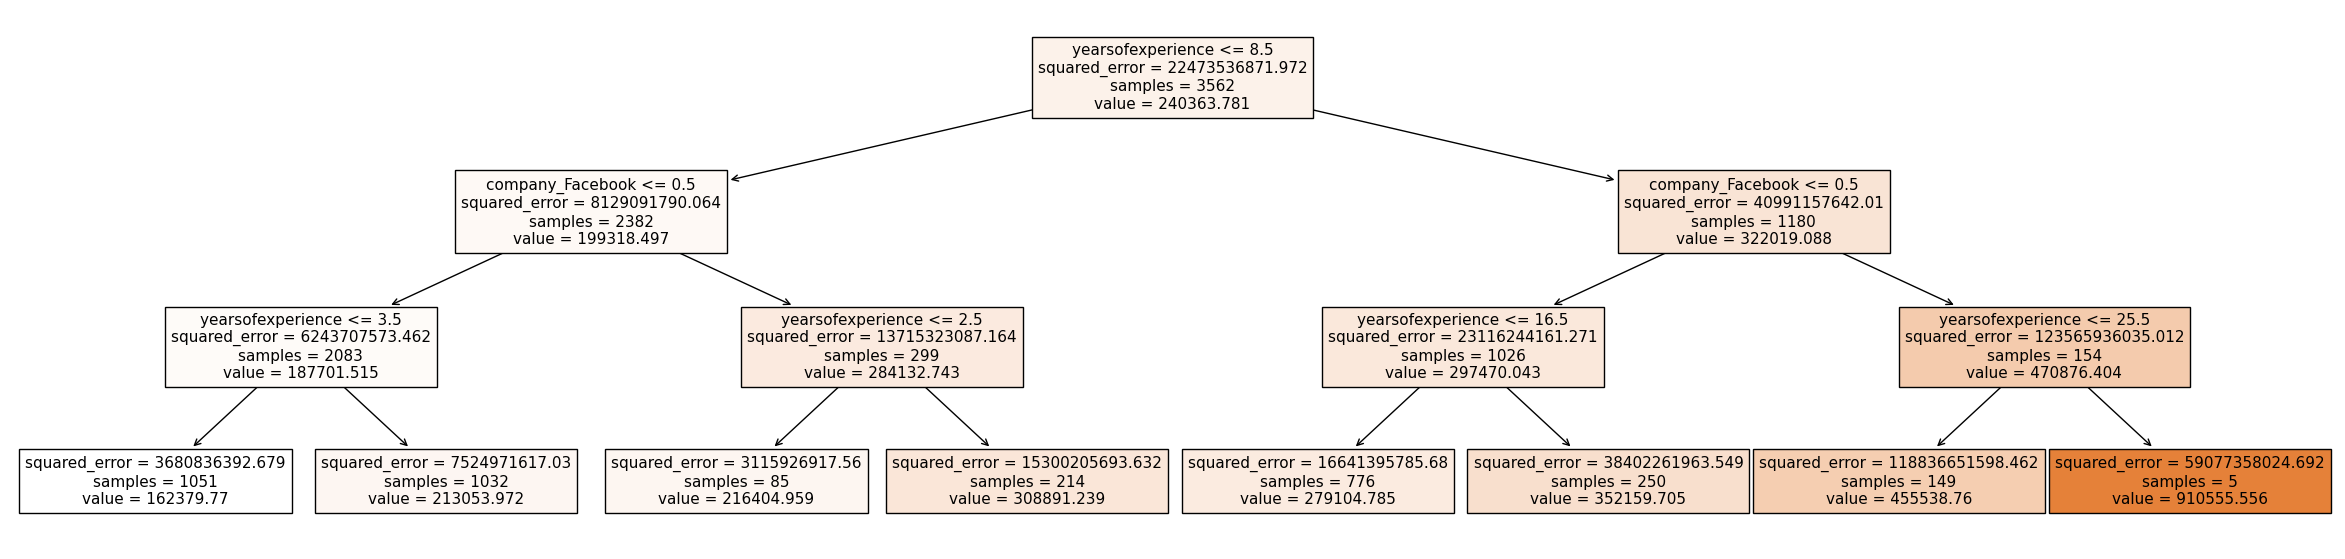

In [24]:
# base_tree = bagging_model.estimators_[0].base_estimator_ # base_tree = bagging_model.estimators_[0]

plot = bagging_model_pruned.estimators_[0]

plt.figure(figsize=(30, 7))
plot_tree(plot, filled=True, feature_names=x_train.columns) # type: ignore
plt.show()

similar but distinct from R as once again - unlike part 6 this model is deterministic, but the BAgg tree algorithm is implemented differently here & in R

### **Don't forget the MSE:**

heres another table to visualize the error margin:

& now the MSE: